In [2]:
import openturns as ot
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from dependence.tests import func_sum
from dependence.tests.test_functions import func_cum_sum_weight
from dependence import ConservativeEstimate
from dependence import quantile_func

from dependence import iterative_vine_minimize
from dependence.dependence_plot import matrix_plot_results

%matplotlib inline
%load_ext autoreload
%autoreload 2

random_state = 123
np.random.seed(random_state)

In [3]:
dim = 10
margins = [ot.Normal()]*dim
alpha = 0.01
q_func = quantile_func(alpha)

families = np.zeros((dim, dim), dtype=int)
for i in range(1, dim):
    for j in range(i):
        families[i, j] = 1

In [4]:
import itertools
n_influencial_pairs = 2
val_influencial = 1.
val_non_influencial = 0.0
corr_dim = dim * (dim-1)/2

all_pairs = np.asarray(list(itertools.combinations(range(dim), 2)))
selected_pairs = all_pairs[np.random.choice(range(corr_dim), size=n_influencial_pairs, replace=False)]
# Random pairs
power = np.zeros((dim, dim))
for i in range(1, dim):
    for j in range(i):
        if [j, i] in selected_pairs.tolist():
            print [i, j]
            power[i, j] = val_influencial
        else:
            power[i, j] = val_non_influencial
power

[4, 1]
[9, 0]


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [5]:
func = lambda x: func_cum_sum_weight(x, power)

In [12]:
algorithm_parameters = {
    "n_input_sample": 20000,
    "n_dep_param_init": None,
    "max_n_pairs": 4,
    "grid_type": 'vertices',
    "q_func": q_func,
    "n_add_pairs": 2,
    "n_remove_pairs": 2,
    "adapt_vine_structure": False,
    "with_bootstrap": False,
    "verbose": True,
    "iterative_save": False,
    "iterative_load": False,
    "load_input_samples": False,
    "keep_input_samples": False
}

quant_estimate = ConservativeEstimate(model_func=func, margins=margins, families=families)

iterative_results = iterative_vine_minimize(estimate_object=quant_estimate, **algorithm_parameters)

n=20000. Worst quantile of [(1, 0)] at -2.97605765611
n=20000. Worst quantile of [(2, 0)] at -2.98968871554
n=20000. Worst quantile of [(2, 1)] at -2.96624365188
n=20000. Worst quantile of [(3, 0)] at -2.92227467172
n=20000. Worst quantile of [(3, 1)] at -2.9814495765
n=20000. Worst quantile of [(3, 2)] at -2.96658266001
n=20000. Worst quantile of [(4, 0)] at -2.98287891207
n=20000. Worst quantile of [(4, 1)] at -2.96153089588
n=20000. Worst quantile of [(4, 2)] at -2.97070936858
n=20000. Worst quantile of [(4, 3)] at -2.94914179679
n=20000. Worst quantile of [(5, 0)] at -3.0146284909
n=20000. Worst quantile of [(5, 1)] at -2.95046430593
n=20000. Worst quantile of [(5, 2)] at -2.9935546553
n=20000. Worst quantile of [(5, 3)] at -2.95689985461
n=20000. Worst quantile of [(5, 4)] at -2.9902013523
n=20000. Worst quantile of [(6, 0)] at -2.97107979452
n=20000. Worst quantile of [(6, 1)] at -2.97365507464
n=20000. Worst quantile of [(6, 2)] at -2.99772387039
n=20000. Worst quantile of [(6, 

/home/D58174/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error in length(args$par) %in% c(1, n) : Interrupted

  warnings.warn(x, RRuntimeWarning)


KeyboardInterrupt: 

In [312]:
quant_estimate = ConservativeEstimate(model_func=func, margins=margins, families=families)

In [8]:
n = 10000
K = 2000
grid_results = quant_estimate.gridsearch_minimize(n_dep_param=K, n_input_sample=n, q_func=q_func)

2000

In [9]:
grid_results.min_quantity

-4.4089211326933269

In [6]:
algorithm_parameters = {
    "n_input_sample": 10000,
    "n_dep_param_init": 20,
    "max_n_pairs": 1,
    "grid_type": 'lhs',
    "q_func": q_func,
    "n_add_pairs": 1,
    "n_remove_pairs": 0,
    "adapt_vine_structure": False,
    "with_bootstrap": False,
    "verbose": True,
    "iterative_save": False,
    "iterative_load": False,
    "load_input_samples": False,
    "keep_input_samples": False
}

quant_estimate = ConservativeEstimate(model_func=func, margins=margins, families=families)

iterative_results = iterative_vine_minimize(estimate_object=quant_estimate, **algorithm_parameters)

n=10000. Worst quantile of [(1, 0)] at -5.65876523485
n=10000. Worst quantile of [(2, 0)] at -4.77250600977
n=10000. Worst quantile of [(2, 1)] at -4.72985746648
n=10000. Worst quantile of [(3, 0)] at -4.79872411822
n=10000. Worst quantile of [(3, 1)] at -4.80716201483
n=10000. Worst quantile of [(3, 2)] at -4.79565815006
n=10000. Worst quantile of [(4, 0)] at -5.75381845533
n=10000. Worst quantile of [(4, 1)] at -5.81664137332
n=10000. Worst quantile of [(4, 2)] at -4.73649594828
n=10000. Worst quantile of [(4, 3)] at -4.76677639444
n=10000. Worst quantile of [(5, 0)] at -4.7790419568
n=10000. Worst quantile of [(5, 1)] at -4.76285193325
n=10000. Worst quantile of [(5, 2)] at -4.77067799387
n=10000. Worst quantile of [(5, 3)] at -4.77456180317
n=10000. Worst quantile of [(5, 4)] at -4.75923094635
n=10000. Worst quantile of [(6, 0)] at -4.7322153994
n=10000. Worst quantile of [(6, 1)] at -4.80086171923
n=10000. Worst quantile of [(6, 2)] at -4.79024601341
n=10000. Worst quantile of [(6

In [ ]:
results = iterative_results[0]
matrix_plot_results(results, figsize=(18, 15))
plt.savefig('output/matrix_plot.png')

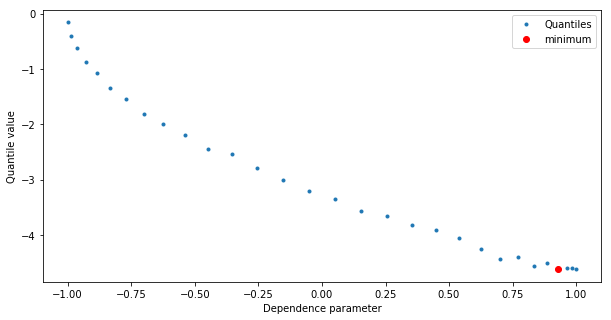

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(grid_result.dep_params, grid_result.quantities, '.', label='Quantiles')
ax.plot(min_result.dep_param[0], min_result.quantity, 'ro', label='minimum')
ax.set_xlabel('Dependence parameter')
ax.set_ylabel('Quantile value')
ax.legend(loc=0)